# EXERCISE(P.1) - INTRODUCTION TO DATA ANALYSIS/DATA SCIENCE

In [17]:
import pandas as pd
df = pd.read_csv(r'datasets\avocado.csv',index_col=0)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
#df.head()
newYorkDf = df[df['region']=="NewYork"]
newYorkDf.head()

#newYorkDf['AveragePrice'].plot()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
01/01/2017,2.06,39260.55,6071.70,20105.65,1025.49,12057.71,11934.77,122.94,0.00,organic,2017,NewYork
01/01/2017,1.44,940983.17,10498.68,668183.16,22804.60,239496.73,208504.55,30684.59,307.59,conventional,2017,NewYork
01/02/2015,1.36,1433763.11,22622.87,1084529.78,3251.93,323358.53,243186.43,80172.10,0.00,conventional,2015,NewYork
01/02/2015,1.93,24697.84,1867.35,12683.96,7.36,10139.17,10139.17,0.00,0.00,organic,2015,NewYork
01/03/2015,1.18,1338129.89,19919.91,1025372.06,2849.43,289988.49,228539.44,61449.05,0.00,conventional,2015,NewYork


# EXERCISE(P.2) - Graphing/Visualization

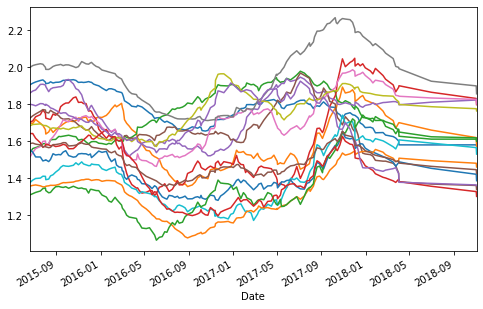

In [21]:
import pandas as pd
df = pd.read_csv(r'datasets\avocado.csv', index_col=0)
df = df.copy()[df['type']=='organic']
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#df.sort_values(by='Date',ascending=True,inplace=True)
#df.sort_index(inplace=True)
newYorkDf = df.copy()[df['region']=='NewYork']
newYorkDf['avgPrice'] = newYorkDf['AveragePrice'].rolling(25).mean()
#newYorkDf.tail()
newDf = pd.DataFrame()
for region in df['region'].unique()[:16]:
    #print(region)
    regionDf = df.copy()[df['region']==region]
    regionDf.set_index('Date', inplace=True)
    regionDf.sort_values(by='Date',ascending=True,inplace=True)
    regionDf.sort_index(inplace=True)
    regionDf[f'{region}_avgPrice'] = regionDf['AveragePrice'].rolling(25).mean()
    if newDf.empty:
        newDf = regionDf[[f'{region}_avgPrice']]
    else:
        newDf = newDf.join(regionDf[f'{region}_avgPrice'])
newDf.dropna().plot(figsize=(8,5),legend=False)

# EXERCISE3(P.3) - GROUPBY

In [4]:
import pandas as pd
import numpy as np
minWage = pd.read_csv('datasets\min_wage.csv', index_col=0)
#minWage.set_index('Year', inplace=True)
gb = minWage.groupby('State')
#gb.get_group("New York").head()
actMinWage = pd.DataFrame()
for name,group in gb:
    if actMinWage.empty:
        actMinWage = group.set_index('Year')[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        actMinWage = actMinWage.join(group.set_index('Year')[["Low.2018"]].rename(columns={"Low.2018":name}))
actMinWage.replace(0, np.NaN).dropna(axis=1).head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


# Exercise4(P.4)-Visualizing Correlation Table

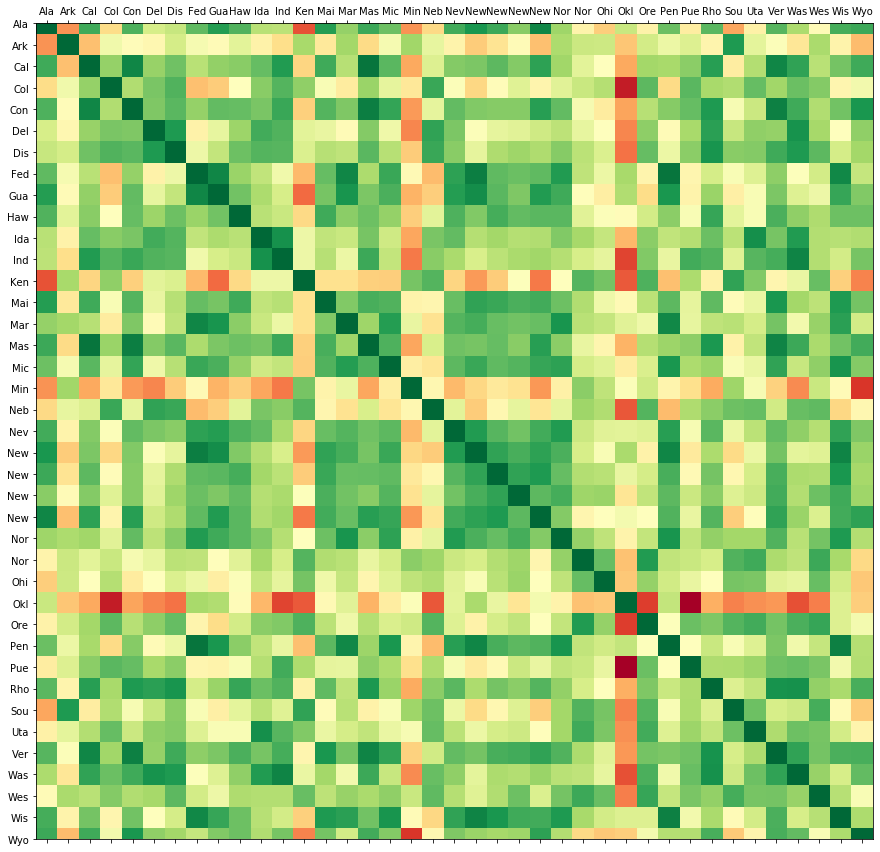

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

minWage = pd.read_csv('datasets\min_wage.csv')
newGb = pd.DataFrame()
gb = minWage.groupby('State')
for name, group in gb:
    if newGb.empty:
        newGb = group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name})
    else:
        newGb = newGb.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name}))
#newGb.head()
newGbCorr = newGb.replace(0, np.NaN).dropna(axis=1).corr()
labels = [c[:3] for c in newGbCorr.columns]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.matshow(newGbCorr, cmap=plt.cm.RdYlGn)

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

plt.show()

In [ ]:
import pandas as pd
dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
stateAbbv = dfs[0]
stateAbbv.to_csv('datasets\stateAbbv.csv', index=False)
stateAbbv = pd.read_csv('datasets\stateAbbv.csv',index_col = 0)

posCode = stateAbbv[['Postal Code']].to_dict()
posCode = posCode['Postal Code']
posCode['Federal (FLSA)'] = "FLSA"
posCode['Guam'] = "Gu"
posCode['Puerto Rico'] = "Pr"

labels = [posCode[c] for c in newGbCorr.columns]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.matshow(newGbCorr, cmap=plt.cm.RdYlGn)

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

plt.show()

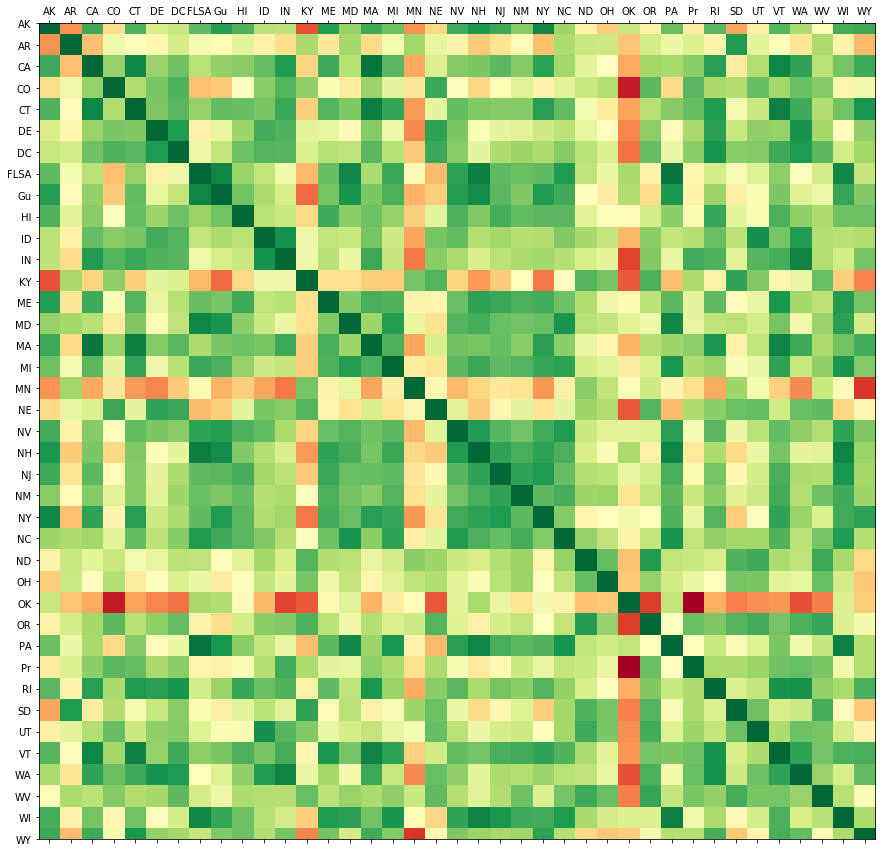

In [62]:
import pandas as pd
stateAbbv = pd.read_csv('datasets\stateAbbv.csv',index_col=0)
#stateAbbv.head()
posCode = stateAbbv[['Postal Code']].to_dict()
posCode = posCode['Postal Code']
posCode['Federal (FLSA)'] = "FLSA"
posCode['Guam'] = "Gu"
posCode['Puerto Rico'] = "Pr"
labels = [posCode[c] for c in newGbCorr]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.matshow(newGbCorr, cmap=plt.cm.RdYlGn)

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

plt.show()

# Exercise5(P.5)-Combining Multiple Dataset

In [69]:
import pandas as pd
import numpy as np
unEmp = pd.read_csv('datasets\output.csv')
unEmp.set_index('Year').head()

,Month,State,County,Rate
Year,,,,
2015,February,Mississippi,Newton County,6.1
2015,February,Mississippi,Panola County,9.4
2015,February,Mississippi,Monroe County,7.9
2015,February,Mississippi,Hinds County,6.1
2015,February,Mississippi,Kemper County,10.6


In [70]:
minWage = pd.read_csv('datasets\min_wage.csv',index_col = 0)
newGb = pd.DataFrame()
for data, group in minWage.groupby('State'):
    if newGb.empty:
        newGb = group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':data})
    else:
        newGb = newGb.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':data}))
newGb.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [71]:
newGb = newGb.replace(0, np.NaN).dropna(axis=1)
newGb.tail()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2013,8.33,6.72,8.60,8.36,8.87,7.79,8.87,7.79,7.79,7.79,...,7.79,5.46,8.33,7.79,7.79,9.24,9.88,7.79,7.79,5.54
2014,8.20,6.61,9.52,8.46,9.20,8.20,10.05,7.67,7.67,7.67,...,7.67,5.37,8.46,7.67,7.67,9.23,9.86,7.67,7.67,5.45
2015,9.24,7.92,9.51,8.69,9.67,8.72,11.09,7.66,8.72,8.19,...,7.66,5.37,9.51,8.98,7.66,9.67,10.00,8.45,7.66,5.44
2016,10.17,8.35,10.43,8.67,10.02,8.61,12.00,7.56,8.61,8.87,...,7.56,5.30,10.02,8.92,7.56,10.02,9.88,9.13,7.56,5.37
2017,10.01,8.68,10.22,9.50,10.32,8.43,11.75,7.41,8.43,9.45,...,7.41,5.19,9.81,8.84,7.41,10.22,11.24,8.94,7.41,5.26


In [72]:
def getMinWage(year,state):
    try:
        return newGb.loc[year,state]
    except:
        return np.NaN
getMinWage(2013,'Colorado')

8.36

In [73]:
%%time
unEmp['minWage'] = list(map(getMinWage, unEmp['Year'], unEmp['State']))

Wall time: 7h 49min 4s


In [74]:
##Filtering Records
unEmpF = unEmp.copy()[(unEmp['Year']==2015)&(unEmp['Month']=='February')]
unEmpF.head()

,Year,Month,State,County,Rate,minWage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [75]:
stateAbbv = pd.read_csv('datasets\stateAbbv.csv', index_col=0)
statePos= stateAbbv.to_dict()['Postal Code']
unEmpF['State'] = unEmpF['State'].map(statePos)
unEmpF.tail()

,Year,Month,State,County,Rate,minWage
2797,2015,February,ME,Somerset County,8.4,7.92
2798,2015,February,ME,Oxford County,6.8,7.92
2799,2015,February,ME,Knox County,6.1,7.92
2800,2015,February,ME,Piscataquis County,7.0,7.92
2801,2015,February,ME,Aroostook County,7.2,7.92


In [87]:
pres16 = pd.read_csv('datasets\pres16results.csv')
pres16 = pres16.rename(columns={'county':'County','st':'State'})
for df in [unEmpF, pres16]:
    df.set_index(['County','State'], inplace=True)
pres16.tail()

,,fips,cand,pct_report,votes,total_votes,pct,lead
County,State,,,,,,,
Yauco Municipio,NaN,72153,NaN,NaN,NaN,NaN,NaN,NaN
Midway Islands,NaN,74300,NaN,NaN,NaN,NaN,NaN,NaN
St. Croix Island,NaN,78010,NaN,NaN,NaN,NaN,NaN,NaN
St. John Island,NaN,78020,NaN,NaN,NaN,NaN,NaN,NaN
St. Thomas Island,NaN,78030,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pres16 = pres16[pres16['cand'] == "Donald Trump"]
pres16 = pres16[['pct']]
pres16.dropna(inplace=True)
pres16.head()

In [91]:
allTogether = unEmpF.merge(pres16, on=['County','State'])
allTogether.dropna(inplace=True)
allTogether.drop('Year', axis=1, inplace=True)
allTogether

Month  Rate  minWage   fips             cand  \
County              State                                                    
Major County        OK     February   2.6     2.11  40093     Donald Trump   
                    OK     February   2.6     2.11  40093  Hillary Clinton   
                    OK     February   2.6     2.11  40093     Gary Johnson   
Pottawatomie County OK     February   4.5     2.11  40125     Donald Trump   
                    OK     February   4.5     2.11  40125  Hillary Clinton   
...                             ...   ...      ...    ...              ...   
Piscataquis County  ME     February   7.0     7.92  23021       Jill Stein   
Aroostook County    ME     February   7.2     7.92  23003     Donald Trump   
                    ME     February   7.2     7.92  23003  Hillary Clinton   
                    ME     February   7.2     7.92  23003     Gary Johnson   
                    ME     February   7.2     7.92  23003       Jill Stein   

                           pct_report    votes  total_votes       pct  \
County              State                                               
Major County        OK            1.0   2940.0       3399.0  0.864960   
                    OK            1.0    310.0       3399.0  0.091203   
                    OK            1.0    149.0       3399.0  0.043836   
Pottawatomie County OK            1.0  17826.0      25417.0  0.701342   
                    OK            1.0   6005.0      25417.0  0.236259   
...                               ...      ...          ...       ...   
Piscataquis County  ME            1.0    179.0       9144.0  0.019576   
Aroostook County    ME            1.0  19419.0      34963.0  0.555416   
                    ME            1.0  13377.0      34963.0  0.382604   
                    ME            1.0   1651.0      34963.0  0.047221   
                    ME            1.0    516.0      34963.0  0.014758   

                                   lead  
County              State                
Major County        OK     Donald Trump  
                    OK     Donald Trump  
                    OK     Donald Trump  
Pottawatomie County OK     Donald Trump  
                    OK     Donald Trump  
...                                 ...  
Piscataquis County  ME     Donald Trump  
Aroostook County    ME     Donald Trump  
                    ME     Donald Trump  
                    ME     Donald Trump  
                    ME     Donald Trump  

[9489 rows x 10 columns]

In [ ]:
allTogether.corr()

In [ ]:
allTogether.cov()

# Exercise6(P.6)-Machine Learning with Scikit Learn

In [20]:
import pandas as pd
diamonds = pd.read_csv('datasets\diamonds.csv', index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
#diamonds['cut'].astype("category").cat.codes
cutClassDict = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarityDict = {"I3":1,"I2":2,"I1":3,"SI2":4,"SI1":5,"VS2":6,"VS1":7,"VVS2":8,"VVS1":9, "IF":10}
colorDict = {"J":1,"I":2,"H":3,"G":4,"F":5,"E":6,"D":7}

diamonds['cut'] = diamonds['cut'].map(cutClassDict)
diamonds['color'] = diamonds['color'].map(colorDict)
diamonds['clarity'] = diamonds['clarity'].map(clarityDict)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [22]:
cut = diamonds['cut'].unique()
cut

array([5, 4, 2, 3, 1], dtype=int64)

In [23]:
import sklearn
from sklearn import svm, preprocessing
diamonds = sklearn.utils.shuffle(diamonds)
X = diamonds.drop("price", axis=1)
y = diamonds['price'].values
X = preprocessing.scale(X)
testSize = 200

XTrain = X[:-testSize]
yTrain = y[:-testSize] 

XTest = X[-testSize:]
yTest = y[-testSize:]

clf = svm.SVR(kernel="linear")
clf.fit(XTrain, yTrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
clf.score(XTest, yTest)

0.8140195235411223

In [27]:
for X,y in zip(XTest,yTest):
    print(f"Model- {clf.predict([X])[0]}, Actual-{y}")

Model- 12055.67410129374, Actual-13003
Model- 275.1841585189741, Actual-645
Model- 4973.349827845706, Actual-6094
Model- 3347.877237882886, Actual-2967
Model- 829.0825530728885, Actual-852
Model- 1309.3106245351573, Actual-1053
Model- -119.68816533993186, Actual-603
Model- 5408.19284221402, Actual-5947
Model- 2382.356316916929, Actual-1799
Model- 233.08869801693118, Actual-600
Model- 934.4433661402036, Actual-1114
Model- 2567.3158559134627, Actual-2318
Model- -507.53526806939544, Actual-461
Model- 9328.972573539799, Actual-15365
Model- 191.56577748837208, Actual-625
Model- 1058.6038726749352, Actual-1024
Model- 8173.673554111872, Actual-8193
Model- 2576.4421075580753, Actual-2111
Model- 856.9491257013924, Actual-789
Model- 1890.4401933768756, Actual-1694
Model- 424.84701996465446, Actual-639
Model- 1395.5005471861864, Actual-988
Model- -123.6156923512167, Actual-490
Model- 3794.5401708350196, Actual-2827
Model- 380.9212327153741, Actual-704
Model- 1269.240558534732, Actual-1076
Model- 

In [31]:
clf = svm.SVR(kernel='rbf')
clf.fit(XTest,yTest)

C:\Users\John Solomon\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
print(clf.score(XTest, yTest))
for X, y in zip(XTest, yTest):
    print(f"Model:{clf.predict([X])[0]}, Actual:{y}")

-0.19713267546807556
Model:1808.1978185918147, Actual:13003
Model:1757.6916866273384, Actual:645
Model:1819.3778606385108, Actual:6094
Model:1811.4294035798828, Actual:2967
Model:1770.6355600350485, Actual:852
Model:1762.6781462151794, Actual:1053
Model:1783.1921073305748, Actual:603
Model:1813.8634137867384, Actual:5947
Model:1799.1000001669397, Actual:1799
Model:1761.5528034202362, Actual:600
Model:1759.570619671094, Actual:1114
Model:1778.3276510172666, Actual:2318
Model:1772.4548517748008, Actual:461
Model:1818.9791136134154, Actual:15365
Model:1769.1844440410084, Actual:625
Model:1756.3002931014325, Actual:1024
Model:1823.5412049018798, Actual:8193
Model:1794.3388059122728, Actual:2111
Model:1755.5660784016277, Actual:789
Model:1771.5045790899733, Actual:1694
Model:1766.2698103441166, Actual:639
Model:1765.0232015552879, Actual:988
Model:1762.0362789263536, Actual:490
Model:1800.6263807695343, Actual:2827
Model:1753.7177696214883, Actual:704
Model:1764.233389547955, Actual:1076
Mo

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)